# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Functions
### variableDataCompare
Create Scatter Plot, Histogram and statistically Compare Train and Test Populations

In [2]:
# Function to plot two populations
def variableDataCompare(index1, index2, population1, population2, label1, label2, title, xlabel, ylabel):
    
    # set the figure size
    plt.figure(figsize=(20,8))

    # Scatter Plot of Data
    plt.subplot(2,1,1)
    plt.scatter(index1, population1, marker='o', color='b', label=label1)
    plt.scatter(index2, population2, marker='x', color='g', label=label2)
    plt.title(title,color='k', size=14, weight='bold')
    plt.xlabel("index")
    plt.ylabel(xlabel)
    plt.legend(loc="best")
    plt.grid(alpha=0.5)
    
    # Historgram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 50, density=False, alpha=0.7, color='b', label=label1)
    plt.hist(population2, 50, density=False, alpha=0.7, color='g', label=label2)
    plt.axvline(population1.mean(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(population2.mean(), color='g', linestyle='dashed', linewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.legend(loc="best")
    plt.grid(alpha=0.5)
    
    # Save the Figure
#    plt.savefig("./Images/" + title.replace(" ", "") + ".png")
    
    # Student t-test
    print('\033[1m' + "Student t-test with unequal variance" + '\033[0m')
    print(stats.ttest_ind(population1, population2, equal_var=False))
    
    # ANOVA test
    print('\033[1m' + '\nANOVA test' + '\033[0m')
    print(stats.f_oneway(population1, population2))
    
    # Kruskal
    print('\033[1m' + '\nKruskal test' + '\033[0m')
    print(stats.kruskal(population1, population2))
    
    return

In [3]:
def plotHistogram(population1, population2, label1, label2, title, xlabel):
    # Historgram Plot of Data
    plt.subplot(1, 1, 1)
    plt.hist(population1, 10, density=False, alpha=0.7, color='b', label=label1)
    plt.hist(population2, 10, density=False, alpha=0.7, color='g', label=label2)
    plt.axvline(population1.mean(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(population2.mean(), color='g', linestyle='dashed', linewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.legend(loc="best")
    plt.grid(alpha=0.5)
    return

# Load Data Sets

In [4]:
path = '../data/'
X_train = pd.read_csv(path + "X_train.csv")
X_test = pd.read_csv(path + "X_test.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_test = pd.read_csv(path + "y_test.csv")

# Run Variable Data Statistical Tests and Plots

Student t-test with unequal variance
Ttest_indResult(statistic=0.358895130891616, pvalue=0.7203387220235976)

ANOVA test
F_onewayResult(statistic=0.14514279066520858, pvalue=0.7034961278929862)

Kruskal test
KruskalResult(statistic=0.1620281795194595, pvalue=0.6872960447038419)


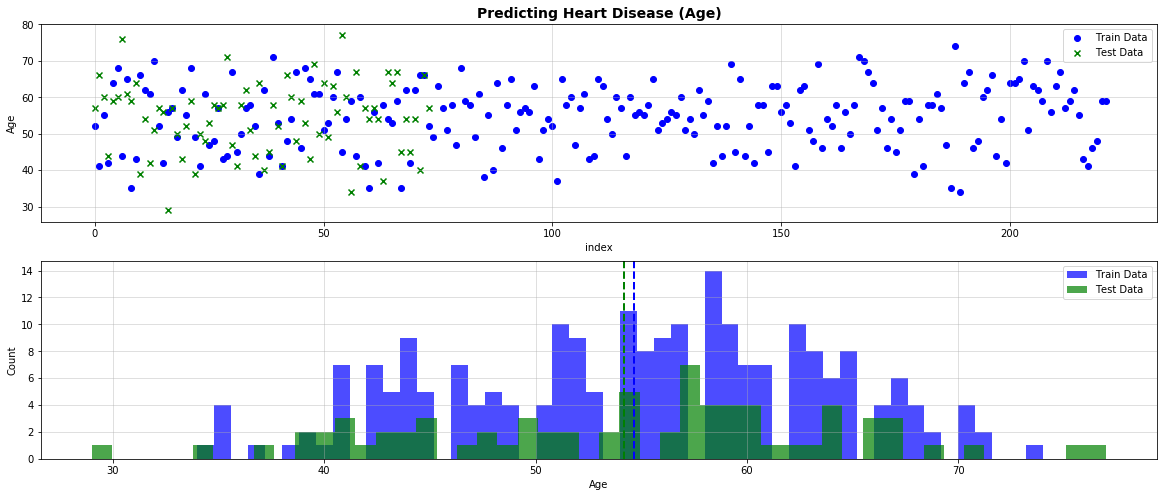

In [5]:
variableDataCompare(X_train.index, X_test.index, X_train['age'], X_test['age'],
            "Train Data", "Test Data", "Predicting Heart Disease (Age)", "Age", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=0.03009549713312377, pvalue=0.9760338605532292)

ANOVA test
F_onewayResult(statistic=0.0008036078603563515, pvalue=0.9774038478453894)

Kruskal test
KruskalResult(statistic=0.22710324896005893, pvalue=0.6336800942016898)


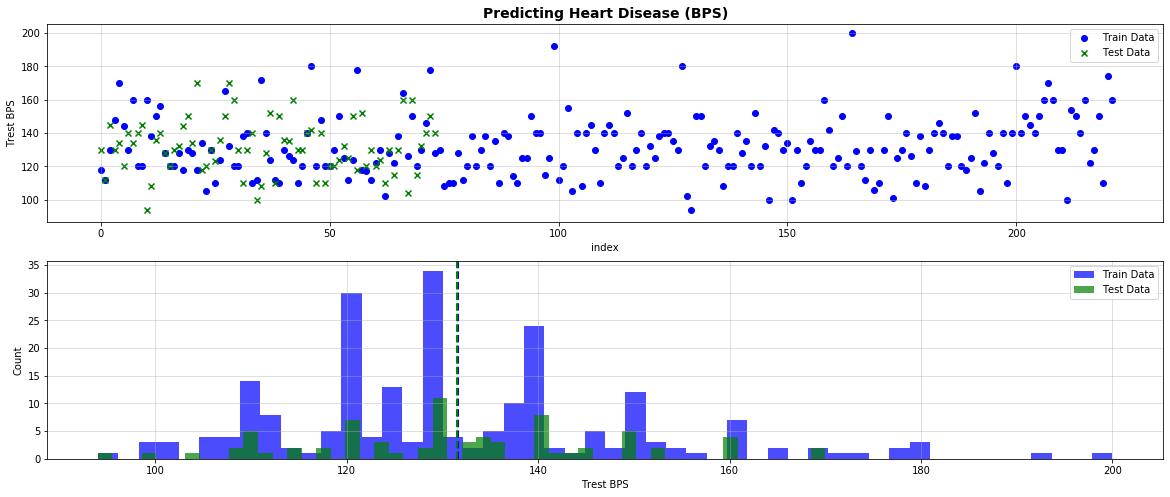

In [6]:
variableDataCompare(X_train.index, X_test.index, X_train['trestBps'], X_test['trestBps'],
            "Train Data", "Test Data", "Predicting Heart Disease (BPS)", "Trest BPS", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=2.160221326237518, pvalue=0.03287481070789071)

ANOVA test
F_onewayResult(statistic=5.330276897522094, pvalue=0.021651555043991282)

Kruskal test
KruskalResult(statistic=7.881029271255125, pvalue=0.004995604014138708)


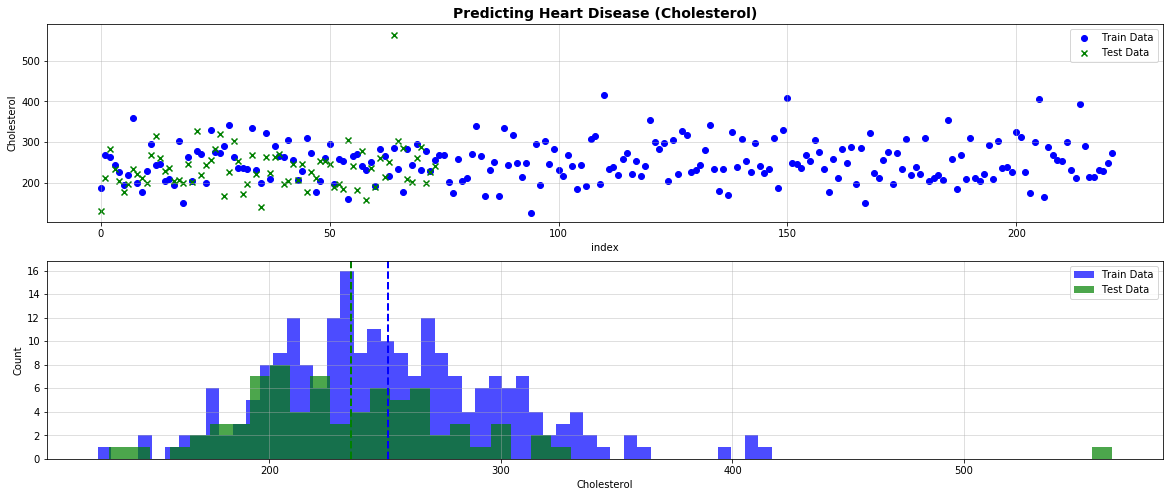

In [7]:
variableDataCompare(X_train.index, X_test.index, X_train['cholesterol'], X_test['cholesterol'],
            "Train Data", "Test Data", "Predicting Heart Disease (Cholesterol)", "Cholesterol", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=0.1959990524351666, pvalue=0.8449725787647133)

ANOVA test
F_onewayResult(statistic=0.045345383866167724, pvalue=0.8315177864839455)

Kruskal test
KruskalResult(statistic=0.00590707316051419, pvalue=0.9387369186852982)


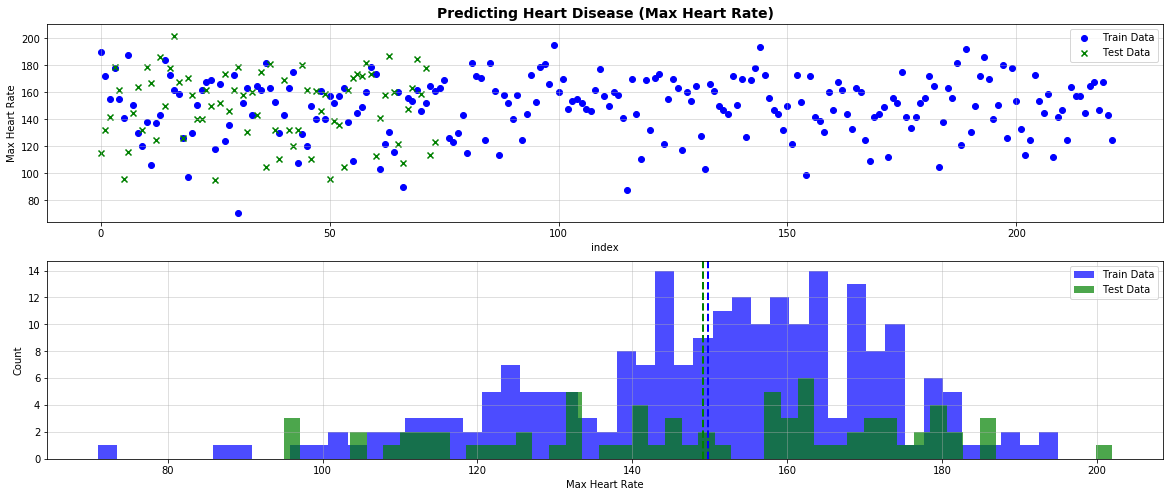

In [8]:
variableDataCompare(X_train.index, X_test.index, X_train['maxHeartRate'], X_test['maxHeartRate'],
            "Train Data", "Test Data", "Predicting Heart Disease (Max Heart Rate)", "Max Heart Rate", "Frequency")

Student t-test with unequal variance
Ttest_indResult(statistic=1.173744707055264, pvalue=0.24244243813545274)

ANOVA test
F_onewayResult(statistic=1.1895812730202489, pvalue=0.27630711037485767)

Kruskal test
KruskalResult(statistic=0.8489915107014285, pvalue=0.356837791106947)


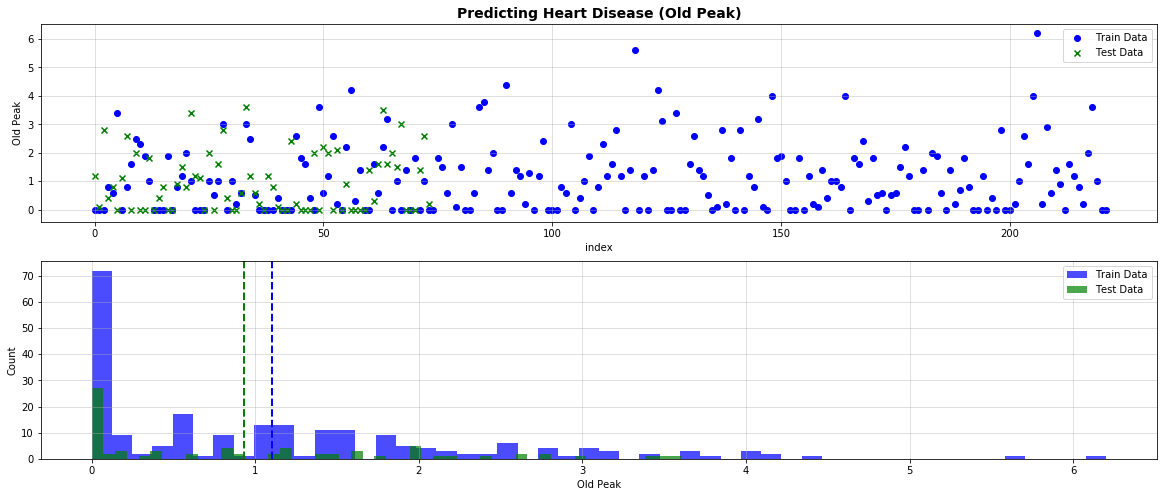

In [9]:
variableDataCompare(X_train.index, X_test.index, X_train['oldPeak'], X_test['oldPeak'],
            "Train Data", "Test Data", "Predicting Heart Disease (Old Peak)", "Old Peak", "Frequency")

## Conclusions:
* The variable data is not statistically different between the two populations for any of the 5 features

# Run Feature Data Tests

In [10]:
variable = ['age', 'trestBps', 'maxHeartRate', 'oldPeak', 'cholesterol']
train = []
test = []
cols = []

for column in X_train.columns:
    if column in variable:
        continue
    train.append(X_train[column].sum())
    test.append(X_test[column].sum())
    cols.append(column)

results = pd.DataFrame(list(zip(cols, train, test)), columns = ['Colulmns','Train','Test'])
results

,Colulmns,Train,Test
0,sex_fem,71,24
1,sex_male,151,50
2,chestPain_abnang,35,14
3,chestPain_angina,16,7
4,chestPain_asympt,106,35
5,chestPain_notang,65,18
6,bloodSugar_fal,184,69
7,bloodSugar_true,38,5
8,ecg_abn,3,1
9,ecg_hyp,114,31
